# November ??th, 2021 (register N162)

**Motivation**: ?? <br>

In [1]:
# HIDE CODE


import os
import sys
import nibabel as nib
import networkx as nx
from time import time
from pprint import pprint
from copy import deepcopy as dc
from os.path import join as pjoin
from myterial import orange, blue_grey
from IPython.display import display, IFrame, HTML
from matplotlib.colors import rgb2hex, to_rgb
import matplotlib.pyplot as plt
import seaborn as sns

# set style & no interpolalation
import matplotlib
matplotlib.rcParams['image.interpolation'] = 'none'
sns.set_style('whitegrid')
%matplotlib inline

# tmp & extras dir
git_dir = pjoin(os.environ['HOME'], 'Dropbox/git')
tmp_dir = pjoin(git_dir, 'jb-Ca-fMRI/tmp')
extras_dir = pjoin(git_dir, 'jb-Ca-fMRI/_extras')
lfr_dir = pjoin(os.environ['HOME'], 'Documents/workspaces/lfr/binary_overlapping')


# GitHub
sys.path.insert(0, pjoin(git_dir, '_Ca-fMRI'))
from register.atlas import make_tree_graph
from register.parcellation import Parcellation
from analysis.hierarchical import Hierarchical
from analysis.fourier import *
from analysis.bootstrap import *
from analysis.svinet import *
from analysis.group import *
from analysis.lfr import *
from utils.render import *
from utils.plotting import *
from model.mouse import Mice
from model.configuration import Config

# warnings
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [2]:
mice = Mice(Config(192, 4, 100), full_load=True, load_parcel=True, load_allen=True)

In [3]:
from register.register import *
reg = Register(mice, in_house_res=200)

In [4]:
reg.in_house

ANTsImage (RAI)
         Pixel Type : float (float32)
         Components : 1
         Dimensions : (81, 46, 60)
         Spacing    : (200.0, 200.0, 200.0)
         Origin     : (-7.8, -6.2, 6.4)
         Direction  : [1. 0. 0. 0. 1. 0. 0. 0. 1.]

In [5]:
reg.nissl

ANTsImage (RAI)
         Pixel Type : float (float32)
         Components : 1
         Dimensions : (132, 80, 114)
         Spacing    : (100.0, 100.0, 100.0)
         Origin     : (0.0, 0.0, 0.0)
         Direction  : [1. 0. 0. 0. 1. 0. 0. 0. 1.]

In [6]:
kwargs = {
    'types': ['SyN', 'ElasticSyN'],
    'grads': [0.20, 0.25, 0.3, 0.35, 0.40, 0.5, 0.9, 1.2, 1.5],
    'syn_bins': [64, 32, 16, 8],
    'aff_bins': [13, 20, 32, 64],
    'aff_rates': [0.2, 0.6, 0.8],
    'aff_metric': 'mattes',
    'syn_metric': 'mattes',
    'mi_q': 0.5,
    'n_seeds': 10,
}
kwargs

{
    'types': ['SyN', 'ElasticSyN'],
    'grads': [0.2, 0.25, 0.3, 0.35, 0.4, 0.5, 0.9, 1.2, 1.5],
    'syn_bins': [64, 32, 16, 8],
    'aff_bins': [13, 20, 32, 64],
    'aff_rates': [0.2, 0.6, 0.8],
    'aff_metric': 'mattes',
    'syn_metric': 'mattes',
    'mi_q': 0.5,
    'n_seeds': 10
}

In [7]:
reg.set_mode('bold')
reg.mi_base = None

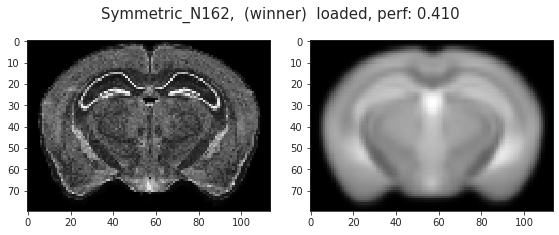

Symmetric_N162, perf:
seed                 7
type        ElasticSyN
grad               0.9
syn_bin             32
aff_bin             13
aff_rate           0.6
metric             sym
score         0.990933

TypeError: 'NoneType' object is not subscriptable

In [8]:
results = reg.fit_register(
    name=reg.in_house_name,
    moving=reg.in_house,
    fixed=reg.nissl,
    save_results=True,
    **kwargs
)

In [9]:
save_obj(results, f"fit_N162_{now()}", tmp_dir, 'npy')

NameError: name 'results' is not defined

2021-11-25 10:21:35,508 : INFO : register.register : Registering Symmetric_N162 . . .

iso: 0.982 VIS: 0.989 CLA: 0.875 mi: 0.520 sym: 0.991 ovp: 0.997 . . . seed-7_type-ElasticSyN_grad-0.90_synbin-32_affbin-13_affrate-0.6

## Kaba continues

In [5]:
self = reg

In [6]:
tx, tx_aff = self.load_tx(self.in_house_name)

In [7]:
tx

[
    '/home/hadi/Documents/Ca-fMRI/processed/transforms/Symmetric_N162_space-CCF3d_ants-inv.mat',
    '/home/hadi/Documents/Ca-fMRI/processed/transforms/Symmetric_N162_space-CCF3d_ants-inv.nii.gz'
]

In [8]:
tx_aff

ANTsTransform
         Type       : AffineTransform
         Dimension  : 3
         Precision  : float

In [9]:
affined = tx_aff.apply_to_image(
    image=self.in_house,
    reference=self.nissl,
    interpolation='linear',
)
_ = self._apply_tx_obj2lps(
    name=self.in_house_name,
    moving=affined,
    moving_orig=self.in_house,
    tx_aff=tx_aff,
    tx=tx,
    use_mm=True,
    save_results=True,
)